# **Task 4 Method I**

In [6]:
!pip install -q Kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shashankarajashekar","key":"b17fba9810a7fba3dc242f74968aadc2"}'}

In [9]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
! cp kaggle.json ~/.kaggle/

In [11]:
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset       11KB  2024-09-28 20:21:12           7483        136  1.0              
lainguyn123/student-performance-factors                      Student Performance Factors                         94KB  2024-09-02 10:53:57          35859        634  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                        22KB  2024-10-06 11:27:38           3765         79  1.0              
mohamedyosef101/2024-olympics-medals-and-economic-status     2024 Olympics Medal

In [13]:
!kaggle datasets download -d swoyam2609/fresh-and-stale-classification

Dataset URL: https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification
License(s): Community Data License Agreement - Permissive - Version 1.0
100% 2.83G/2.84G [00:41<00:00, 117MB/s]
100% 2.84G/2.84G [00:41<00:00, 73.0MB/s]


In [14]:
! unzip fresh-and-stale-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_5372.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_54.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6186.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6285.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6551.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6565.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6985.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7173.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7306.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp 

In [15]:
!rmdir dataset/Test/.ipynb_checkpoints/

Found 23619 images belonging to 18 classes.
Found 6738 images belonging to 18 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


738/738 ━━━━━━━━━━━━━━━━━━━━ 1510s 2s/step - accuracy: 0.4843 - loss: 1.5341 - val_accuracy: 0.7485 - val_loss: 0.6470
Epoch 2/5
  1/738 ━━━━━━━━━━━━━━━━━━━━ 21:22 2s/step - accuracy: 0.7188 - loss: 0.7474

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


738/738 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7188 - loss: 0.7474 - val_accuracy: 0.7222 - val_loss: 0.4576
Epoch 3/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 1574s 2s/step - accuracy: 0.7710 - loss: 0.6110 - val_accuracy: 0.7890 - val_loss: 0.5269
Epoch 4/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 3s 378us/step - accuracy: 0.8438 - loss: 0.5076 - val_accuracy: 0.6667 - val_loss: 0.5320
Epoch 5/5
738/738 ━━━━━━━━━━━━━━━━━━━━ 1578s 2s/step - accuracy: 0.8186 - loss: 0.4667 - val_accuracy: 0.7939 - val_loss: 0.4829
210/210 ━━━━━━━━━━━━━━━━━━━━ 132s 630ms/step - accuracy: 0.7894 - loss: 0.4990
Test accuracy: 0.7936012148857117


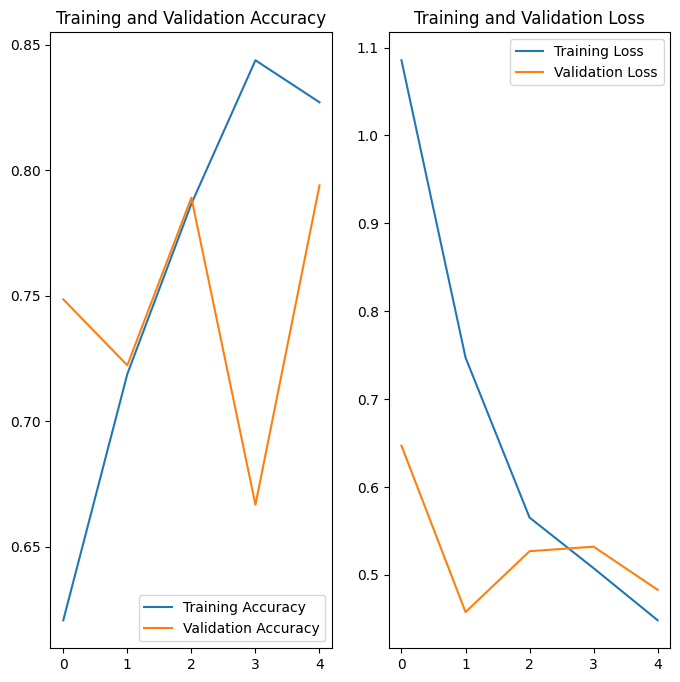

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Set directories for train and test datasets
train_dir = 'dataset/Train'
test_dir = 'dataset/Test'

# Image dimensions
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Rescale pixel values
    rotation_range=40,     # Randomly rotate images
    width_shift_range=0.2, # Randomly shift images horizontally
    height_shift_range=0.2,# Randomly shift images vertically
    shear_range=0.2,       # Shear the image
    zoom_range=0.2,        # Randomly zoom into the image
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'    # Fill any missing pixels after rotation/shift
)

# Data Augmentation for testing (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical' # Use 'binary' if you have only two classes
)

# Load testing data from directory
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(validation_generator.num_classes, activation='softmax')  # Adjust based on the number of classes in the test set (14)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy', # For multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=5, # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // BATCH_SIZE)
print(f'Test accuracy: {test_acc}')

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Redness: 150411
Greenness: 0
Yellowness: 1840
Ripeness Rank: 1


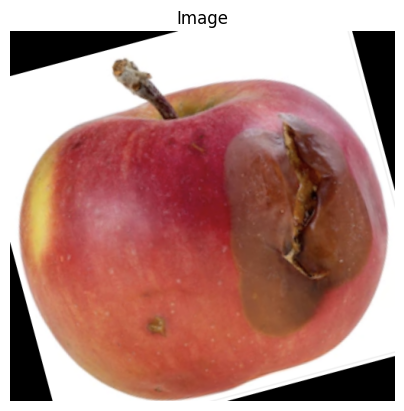

In [38]:
from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# Function to rank ripeness based on color analysis
def rank_ripeness(cnt_r, cnt_y, cnt_g):
    total = cnt_r + cnt_y + cnt_g
    if total == 0:
        return 1  # Rank 1 for no detectable color
    rperc = cnt_r / total
    yperc = cnt_y / total
    gperc = cnt_g / total

    # Adjust the limits for your fruit
    glimit = 0.5
    ylimit = 0.8

    # Determine ripeness based on color percentages
    if gperc > glimit:
        return 2  # Low Ripeness
    elif yperc > ylimit:
        return 8  # High Ripeness
    else:
        return 5  # Medium Ripeness

# Load an image from file
image_path = 'dataset/Test/rottenapples/a_r001.png'  # Update with your image path
frame = cv2.imread(image_path)

if frame is None:
    print("Error: Could not load image.")
    exit()

edge_img = deepcopy(frame)

# Finds edges in the input image
edged = cv2.Canny(edge_img, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

# Find contours in the edge map
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(cnts) == 0:
    print("No contours found.")
    exit()

max_cont = max(cnts, key=cv2.contourArea)

# Draw bounding rectangle around the largest contour
x, y, w, h = cv2.boundingRect(max_cont)
cv2.rectangle(edge_img, (x, y), (x + w, y + h), (0, 0, 255), 2)
croppedk = frame[y:y + h, x:x + w]

# Converting BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Define color ranges and create masks
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

redmask1 = cv2.inRange(hsv, lower_red1, upper_red1)
redmask2 = cv2.inRange(hsv, lower_red2, upper_red2)
redmask = redmask1 + redmask2

kernelOpen = np.ones((5, 5))
kernelClose = np.ones((20, 20))

maskOpen = cv2.morphologyEx(redmask, cv2.MORPH_OPEN, kernelOpen)
maskClose = cv2.morphologyEx(maskOpen, cv2.MORPH_CLOSE, kernelClose)
maskFinal = maskClose

# Count pixels for red
cnt_r = cv2.countNonZero(maskFinal)
print("Redness:", cnt_r)

# Green mask
lower_green = np.array([50, 50, 50])
upper_green = np.array([70, 255, 255])
greenmask = cv2.inRange(hsv, lower_green, upper_green)
cnt_g = cv2.countNonZero(greenmask)
print("Greenness:", cnt_g)

# Yellow mask
lower_yellow = np.array([20, 50, 50])
upper_yellow = np.array([30, 255, 255])
yellowmask = cv2.inRange(hsv, lower_yellow, upper_yellow)
cnt_y = cv2.countNonZero(yellowmask)
print("Yellowness:", cnt_y)

# Calculate ripeness rank
ripeness_rank = rank_ripeness(cnt_r, cnt_y, cnt_g)
print("Ripeness Rank:", ripeness_rank)

# Function to display an image using Matplotlib
def show_image(title, img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display images
show_image('Image', frame)

